<a href="https://colab.research.google.com/github/Shambhaviiiit/judiciary_data_analysis/blob/main/Precog2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import numpy as np

In [ ]:
cases_2010 = dd.read_csv('/content/drive/MyDrive/precog/cases/cases/cases_2010.csv', assume_missing = True, parse_dates = [ 'date_of_filing'])
cases_2011 = dd.read_csv('/content/drive/MyDrive/precog/cases/cases/cases_2011.csv', assume_missing = True, parse_dates = [ 'date_of_filing'])
cases_2012 = dd.read_csv('/content/drive/MyDrive/precog/cases/cases/cases_2012.csv', assume_missing = True, parse_dates = [ 'date_of_filing'])
cases_2013 = dd.read_csv('/content/drive/MyDrive/precog/cases/cases/cases_2013.csv', assume_missing = True, parse_dates = [ 'date_of_filing'])
cases_2014 = dd.read_csv('/content/drive/MyDrive/precog/cases/cases/cases_2014.csv', assume_missing = True, parse_dates = [ 'date_of_filing'])
cases_2015 = dd.read_csv('/content/drive/MyDrive/precog/cases/cases/cases_2015.csv', assume_missing = True, parse_dates = [ 'date_of_filing'])

In [ ]:
# dtypes = dict([(x, np.str) for x in common_cols])

# Dispute Types Analysis


* withdrawn
* referred to lok sabha
* acquitted
* dismissed
* disposed
* judgement

In [ ]:
disp_name = dd.read_csv('/content/drive/MyDrive/precog/keys/keys/disp_name_key.csv')

In [ ]:
disp_name.columns

Index(['year', 'disp_name', 'disp_name_s', 'count'], dtype='object')

In [ ]:
total_disp = disp_name.groupby('year').sum().compute()
total_disp

,disp_name,count
year,,
2010,1326,4281327
2011,1326,5208653
2012,1326,6400783
2013,1326,7555617
2014,1326,8874616
2015,1326,10475876
2016,1378,11349260
2017,1378,13065513
2018,1378,13724299


In [ ]:
withdrawn = disp_name.loc[disp_name['disp_name_s'] == 'withdrawn'].compute()
withdrawn.index = [0,1,2,3,4,5,6,7,8]
withdrawn

,year,disp_name,disp_name_s,count
0,2010,51,withdrawn,140496
1,2011,51,withdrawn,183247
2,2012,51,withdrawn,229729
3,2013,51,withdrawn,276506
4,2014,51,withdrawn,294791
5,2015,51,withdrawn,319350
6,2016,52,withdrawn,306449
7,2017,52,withdrawn,309660
8,2018,52,withdrawn,221903


In [ ]:
total_disp.loc[2+2010].at['count']

6400783

In [ ]:
# percentage withdrawn per year
p_withdrawn = []
for i in range(0,9):
  x = withdrawn.loc[i].at['count'] * 100/ total_disp.loc[i+2010].at['count']
  p_withdrawn.append(x)

p_withdrawn  

[3.281599373278425,
 3.518126471469687,
 3.5890765239190268,
 3.65960847406638,
 3.321732455804285,
 3.0484324174894777,
 2.700167235573068,
 2.3700561929715276,
 1.6168621799918523]

In [ ]:
lok = disp_name.loc[disp_name['disp_name_s'] == 'referred to lok adalat'].compute()
lok.index = [0,1,2,3,4,5,6,7,8]
lok

,year,disp_name,disp_name_s,count
0,2010,42,referred to lok adalat,145648
1,2011,42,referred to lok adalat,172145
2,2012,42,referred to lok adalat,202137
3,2013,42,referred to lok adalat,261011
4,2014,42,referred to lok adalat,355052
5,2015,42,referred to lok adalat,459290
6,2016,43,referred to lok adalat,557311
7,2017,43,referred to lok adalat,720854
8,2018,43,referred to lok adalat,571902


In [ ]:
p_lok = []
for i in range(0,9):
  x = lok.loc[i].at['count'] * 100/ total_disp.loc[i+2010].at['count']
  p_lok.append(x)

In [ ]:
acquitted = disp_name.loc[disp_name['disp_name_s'] == 'acquitted'].compute()
acquitted.index = [0,1,2,3,4,5,6,7,8]

In [ ]:
dismissed = disp_name.loc[disp_name['disp_name_s'] == 'dismissed'].compute()
dismissed.index = [0,1,2,3,4,5,6,7,8]

In [ ]:
disposed = disp_name.loc[disp_name['disp_name_s'] == 'disposed'].compute()
disposed.index = [0,1,2,3,4,5,6,7,8]

In [ ]:
p_acquitted = []
p_dismissed = []
# p_disposition_mis = []
p_disposed = []

for i in range(0,9):
  a = acquitted.loc[i].at['count'] * 100/ total_disp.loc[i+2010].at['count']
  b = dismissed.loc[i].at['count'] * 100/ total_disp.loc[i+2010].at['count']
  # c = disposition_mis.loc[i].at['count'] * 100/ total_disp.loc[i+2010].at['count']
  d = disposed.loc[i].at['count'] * 100/ total_disp.loc[i+2010].at['count']

  p_acquitted.append(a)
  p_dismissed.append(b)
  # p_disposition_mis.append(c)
  p_disposed.append(d)

# p_acquitted
# p_dismissed
# p_disposition_mis
# p_disposed

In [ ]:
p_withdrawn

[3.281599373278425,
 3.518126471469687,
 3.5890765239190268,
 3.65960847406638,
 3.321732455804285,
 3.0484324174894777,
 2.700167235573068,
 2.3700561929715276,
 1.6168621799918523]

In [ ]:
import matplotlib.pyplot as plt

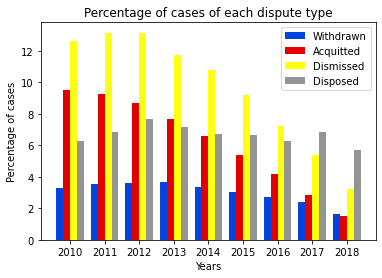

In [ ]:
# plot.bar(range(2010,2019), p_withdrawn, color='blue')
fig, plot = plt.subplots()
# width = 5
X = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
x = np.arange(1,10)

plot.bar(x - 0.3, p_withdrawn, 0.2, label='Withdrawn', color='#0343df')
plot.bar(x - 0.1, p_acquitted, 0.2, label='Acquitted', color='#e50000')
plot.bar(x + 0.1, p_dismissed, 0.2, label='Dismissed', color='#ffff14')
plot.bar(x + 0.3, p_disposed, 0.2, label='Disposed', color='#929591')

plt.xticks(x,X)
plt.xlabel("Years")
plt.ylabel("Percentage of cases")
plt.title("Percentage of cases of each dispute type")
plt.legend()
plt.show()



# Minimum number of cases registered (statewise)

In [32]:
case_state_key = dd.read_csv('/content/drive/MyDrive/precog/keys/keys/cases_state_key.csv', assume_missing=True)

In [ ]:
cases_10_count = cases_2010.groupby('state_code').count().compute()
cases_11_count = cases_2011.groupby('state_code').count().compute()
cases_12_count = cases_2012.groupby('state_code').count().compute()
cases_13_count = cases_2013.groupby('state_code').count().compute()
cases_14_count = cases_2014.groupby('state_code').count().compute()
cases_15_count = cases_2015.groupby('state_code').count().compute()

In [60]:
cases_10_count.head()

,ddl_case_id,year,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
state_code,,,,,,,,,,,,,,,,,,
1.0,866279,866279,866279,866279,866279,866279,866279,866279,866279,866279,866279,827608,866279,866279,804684,858214,866279,841204
2.0,119359,119359,119359,119359,119359,119359,119359,119359,119359,119359,119359,118185,119359,119359,116267,118956,119359,119314
3.0,507691,507691,507691,507691,507691,507691,507691,507691,507691,507691,507691,431707,507691,507691,487640,327493,476121,444968
4.0,217526,217526,217526,217526,217526,217526,217526,217526,217526,217526,217526,214593,217526,217526,212181,212985,212241,215080
5.0,28541,28541,28541,28541,28541,28541,28541,28541,28541,28541,28541,28108,28541,28541,26051,28045,28541,28538


In [ ]:
min_id_10 = cases_10_count.ddl_case_id.idxmin()
min_id_11 = cases_11_count.ddl_case_id.idxmin()
min_id_12 = cases_12_count.ddl_case_id.idxmin()
min_id_13 = cases_13_count.ddl_case_id.idxmin()
min_id_14 = cases_14_count.ddl_case_id.idxmin()
min_id_15 = cases_15_count.ddl_case_id.idxmin()

In [34]:
min_state = dict()

In [37]:
case_state_key.loc[case_state_key['state_code']==min_id_10].compute().head(1)

,year,state_code,state_name,pc11_state_name,pc11_state_id
233,2010.0,24.0,Sikkim,sikkim,11.0


In [36]:
case_state_key.loc[case_state_key['state_code']==min_id_11].compute().head(1)

,year,state_code,state_name,pc11_state_name,pc11_state_id
108,2014.0,33.0,Ladakh,jammu kashmir,1.0


In [38]:
case_state_key.loc[case_state_key['state_code']==min_id_12].compute().head(1)

,year,state_code,state_name,pc11_state_name,pc11_state_id
108,2014.0,33.0,Ladakh,jammu kashmir,1.0


In [39]:
case_state_key.loc[case_state_key['state_code']==min_id_13].compute().head(1)

,year,state_code,state_name,pc11_state_name,pc11_state_id
108,2014.0,33.0,Ladakh,jammu kashmir,1.0


In [40]:
case_state_key.loc[case_state_key['state_code']==min_id_14].compute().head(1)

,year,state_code,state_name,pc11_state_name,pc11_state_id
108,2014.0,33.0,Ladakh,jammu kashmir,1.0


In [41]:
case_state_key.loc[case_state_key['state_code']==min_id_15].compute().head(1)

,year,state_code,state_name,pc11_state_name,pc11_state_id
108,2014.0,33.0,Ladakh,jammu kashmir,1.0


In [49]:
kash_11 = cases_11_count.ddl_case_id.min()
kash_12 = cases_12_count.ddl_case_id.min()
kash_13 = cases_13_count.ddl_case_id.min()
kash_14 = cases_14_count.ddl_case_id.min()
kash_15 = cases_15_count.ddl_case_id.min()


In [52]:
# kash = { '2011' : kash_11, '2012' : kash_12, '2013' : kash_13, '2014' : kash_14, '2015' : kash_15 }
kash = [kash_11, kash_12, kash_13, kash_14, kash_15]
kash

[3, 12, 19, 27, 58]

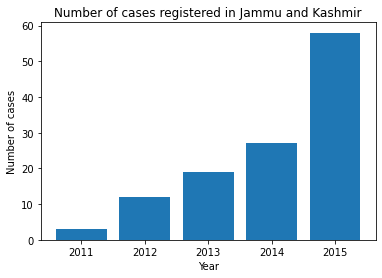

In [73]:
plt.bar(range(2011,2016), kash)
plt.xlabel('Year')
plt.ylabel('Number of cases')
plt.title('Number of cases registered in Jammu and Kashmir')
plt.show()

In [ ]:
case_state_key.groupby(['state_name', 'year']).count().compute().head(20)

In [ ]:
min_state['2010'] = "Sikkim"
min_state['2011'] = "Jammu Kashmir"
min_state['2012'] = "Jammu Kashmir"
min_state['2013'] = "Jammu Kashmir"
min_state['2014'] = "Jammu Kashmir"
min_state['2015'] = "Jammu Kashmir"

In [56]:
cases_10_count.ddl_case_id.min()

172

# Days taken to conclude a case

In [ ]:
cases_2010.columns


Index(['ddl_case_id', 'year', 'state_code', 'dist_code', 'court_no', 'cino',
       'judge_position', 'female_defendant', 'female_petitioner',
       'female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name',
       'disp_name', 'date_of_filing', 'date_of_decision', 'date_first_list',
       'date_last_list', 'date_next_list'],
      dtype='object')

In [ ]:
days_taken = (cases_2010.date_of_decision - cases_2010.date_of_filing).dt.days
days_taken[0]

Dask Series Structure:
npartitions=13
    int64
      ...
    ...  
      ...
      ...
dtype: int64
Dask Name: try_loc, 78 tasks

In [ ]:
cases_2010_nona = cases_2010
cases_2010_nona.dropna

<bound method DataFrame.dropna of Dask DataFrame Structure:
               ddl_case_id     year state_code dist_code court_no    cino judge_position female_defendant female_petitioner female_adv_def female_adv_pet type_name purpose_name disp_name  date_of_filing date_of_decision date_first_list date_last_list date_next_list
npartitions=13                                                                                                                                                                                                                                                           
                    object  float64    float64   float64  float64  object         object           object            object        float64        float64   float64      float64   float64  datetime64[ns]   datetime64[ns]          object         object         object
                       ...      ...        ...       ...      ...     ...            ...              ...               ...            ...    

In [ ]:
cases_2010_nona['days_taken'] = (cases_2010_nona['date_of_decision'] - cases_2010_nona['date_of_filing']).dt.days

print(cases_2010_nona.compute())

ValueError: ignored

In [ ]:
cases_2011_nona = cases_2011
cases_2011_nona.dropna

<bound method DataFrame.dropna of Dask DataFrame Structure:
               ddl_case_id     year state_code dist_code court_no    cino judge_position female_defendant female_petitioner female_adv_def female_adv_pet type_name purpose_name disp_name  date_of_filing date_of_decision date_first_list date_last_list date_next_list
npartitions=16                                                                                                                                                                                                                                                           
                    object  float64    float64   float64  float64  object         object           object            object        float64        float64   float64      float64   float64  datetime64[ns]           object          object         object         object
                       ...      ...        ...       ...      ...     ...            ...              ...               ...            ...    

In [ ]:
cases_2011_nona['days_taken'] = (cases_2011_nona['date_of_decision'] - cases_2011_nona['date_of_filing']).dt.days

print(cases_2011_nona.compute())

ValueError: ignored

# Judge transfer

In [ ]:
cases_judge = dd.read_csv('/content/drive/MyDrive/precog/keys/keys/judge_case_merge_key.csv', assume_missing = True)


In [ ]:
cases_judge.loc[cases_judge['ddl_filing_judge_id'] != cases_judge['ddl_decision_judge_id']].dropna().compute()

,ddl_case_id,ddl_filing_judge_id,ddl_decision_judge_id
3,01-01-01-201900000042016,3.0,5.0
8,01-01-01-201900000062018,5.0,6.0
9,01-01-01-201900000072016,3.0,5.0
13,01-01-01-201900000082018,5.0,6.0
14,01-01-01-201900000092016,3.0,5.0
...,...,...,...
82535,30-02-06-203500000712018,98477.0,98478.0
82536,30-02-06-203500000732018,98428.0,98429.0
82541,30-02-06-203500000782018,98477.0,98478.0
82542,30-02-06-203500000802018,98428.0,98429.0


# Female petitioners

In [65]:
gender_10_ = cases_2010.groupby(['female_petitioner']).count().compute()
gender_11_ = cases_2011.groupby(['female_petitioner']).count().compute()
gender_12_ = cases_2012.groupby(['female_petitioner']).count().compute()
gender_13_ = cases_2013.groupby(['female_petitioner']).count().compute()
gender_14_ = cases_2014.groupby(['female_petitioner']).count().compute()
gender_15_ = cases_2015.groupby(['female_petitioner']).count().compute()

In [66]:
gender_10 = gender_10_.ddl_case_id
gender_11 = gender_11_.ddl_case_id
gender_12 = gender_12_.ddl_case_id
gender_13 = gender_13_.ddl_case_id
gender_14 = gender_14_.ddl_case_id
gender_15 = gender_15_.ddl_case_id

In [67]:
total_10 = gender_10.sum()
total_11 = gender_11.sum()
total_12 = gender_12.sum()
total_13 = gender_13.sum()
total_14 = gender_14.sum()
total_15 = gender_15.sum()

In [68]:
gender_10

female_petitioner
-9998 unclear         1975423
-9999 missing name      22186
0 male                1630197
1 female               653521
Name: ddl_case_id, dtype: int64

In [69]:
p_gender = []

for i in range(6):
  p_gender.append(i)
  
p_gender[0] = (gender_10['1 female'] * 100 / total_10)
p_gender[1] = (gender_11['1 female'] * 100 / total_11)
p_gender[2] = (gender_12['1 female'] * 100 / total_12)
p_gender[3] = (gender_13['1 female'] * 100 / total_13)
p_gender[4] = (gender_14['1 female'] * 100 / total_14)
p_gender[5] = (gender_15['1 female'] * 100 / total_15)

In [70]:
p_gender

[15.264449550338014,
 15.938112982377593,
 16.502637255473275,
 16.005006606343333,
 15.95913558400724,
 15.45029742620092]

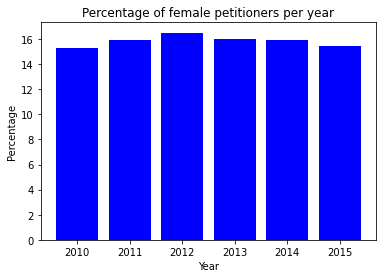

In [72]:
plt.bar(range(2010, 2016), p_gender, color='blue')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of female petitioners per year')
plt.show()